In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt


In [2]:
data = pd.read_csv('delivery_tracking.csv')
data.head()

,id,tracking_number,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date
0,5f4de15806d7504b37050f96,01475110779922,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02 00:00:00
1,5f4de158194b8a626b3dfa92,01475110779858,2020-09-01,2020-09-01 14:54:00,DEU,70563,dpd-de,DE-BW,f,f,Unknown,2020-09-02 09:15:00,2020-09-01 00:00:00
2,5f4de158194b8a626b3dfa96,01475110779891,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01 00:00:00
3,5f4de158194b8a626b3dfa9a,01475110779890,2020-09-01,2020-09-01 14:53:00,ITA,46100,dpd-de,IT-25,f,f,Unknown,2020-09-04 13:09:00,2020-09-01 00:00:00
4,5f4de1582995144b61ea96a6,01475110779860,2020-09-01,2020-09-02 13:02:00,ESP,07817,dpd-de,ES-IB,f,f,Unknown,2020-09-08 17:10:00,2020-09-02 00:00:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  object
 1   tracking_number     10000 non-null  object
 2   created_date        10000 non-null  object
 3   in_transit_date     10000 non-null  object
 4   country             9999 non-null   object
 5   zip_code            9999 non-null   object
 6   courier             10000 non-null  object
 7   delivery_region     9999 non-null   object
 8   delivery_cancelled  10000 non-null  object
 9   return_tracking     10000 non-null  object
 10  delivery_location   10000 non-null  object
 11  delivery_date       10000 non-null  object
 12  pickup_date         10000 non-null  object
dtypes: object(13)
memory usage: 1015.8+ KB


In [4]:
data['created_date'] = pd.to_datetime(data['created_date'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])
data['pickup_date'] = pd.to_datetime(data['pickup_date'])
data['in_transit_date'] = pd.to_datetime(data['in_transit_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   tracking_number     10000 non-null  object        
 2   created_date        10000 non-null  datetime64[ns]
 3   in_transit_date     10000 non-null  datetime64[ns]
 4   country             9999 non-null   object        
 5   zip_code            9999 non-null   object        
 6   courier             10000 non-null  object        
 7   delivery_region     9999 non-null   object        
 8   delivery_cancelled  10000 non-null  object        
 9   return_tracking     10000 non-null  object        
 10  delivery_location   10000 non-null  object        
 11  delivery_date       10000 non-null  datetime64[ns]
 12  pickup_date         10000 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(9)
memory usage: 1

In [5]:
##Creating the epoch version of each date so that it can be used for regression

In [6]:
data['Epoch_transit_date'] = data['in_transit_date'].astype(str)
data['Epoch_transit_date'] = pd.to_datetime(data['Epoch_transit_date']).values.astype(np.int64) // 10 ** 6

data['Epoch_created_date'] = data['created_date'].astype(str)
data['Epoch_created_date'] = pd.to_datetime(data['Epoch_created_date']).values.astype(np.int64) // 10 ** 6

data['Epoch_delivery_date'] = data['delivery_date'].astype(str)
data['Epoch_delivery_date'] = pd.to_datetime(data['Epoch_delivery_date']).values.astype(np.int64) // 10 ** 6

data['Epoch_pickup_date'] = data['pickup_date'].astype(str)
data['Epoch_pickup_date'] = pd.to_datetime(data['Epoch_pickup_date']).values.astype(np.int64) // 10 ** 6

In [7]:
data.head()

,id,tracking_number,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date,Epoch_transit_date,Epoch_created_date,Epoch_delivery_date,Epoch_pickup_date
0,5f4de15806d7504b37050f96,01475110779922,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02,1599052740000,1598918400000,1599203880000,1599004800000
1,5f4de158194b8a626b3dfa92,01475110779858,2020-09-01,2020-09-01 14:54:00,DEU,70563,dpd-de,DE-BW,f,f,Unknown,2020-09-02 09:15:00,2020-09-01,1598972040000,1598918400000,1599038100000,1598918400000
2,5f4de158194b8a626b3dfa96,01475110779891,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01,1598971560000,1598918400000,1599218160000,1598918400000
3,5f4de158194b8a626b3dfa9a,01475110779890,2020-09-01,2020-09-01 14:53:00,ITA,46100,dpd-de,IT-25,f,f,Unknown,2020-09-04 13:09:00,2020-09-01,1598971980000,1598918400000,1599224940000,1598918400000
4,5f4de1582995144b61ea96a6,01475110779860,2020-09-01,2020-09-02 13:02:00,ESP,07817,dpd-de,ES-IB,f,f,Unknown,2020-09-08 17:10:00,2020-09-02,1599051720000,1598918400000,1599585000000,1599004800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10000 non-null  object        
 1   tracking_number      10000 non-null  object        
 2   created_date         10000 non-null  datetime64[ns]
 3   in_transit_date      10000 non-null  datetime64[ns]
 4   country              9999 non-null   object        
 5   zip_code             9999 non-null   object        
 6   courier              10000 non-null  object        
 7   delivery_region      9999 non-null   object        
 8   delivery_cancelled   10000 non-null  object        
 9   return_tracking      10000 non-null  object        
 10  delivery_location    10000 non-null  object        
 11  delivery_date        10000 non-null  datetime64[ns]
 12  pickup_date          10000 non-null  datetime64[ns]
 13  Epoch_transit_date   10000 non-n

In [9]:
print(data.shape)
data.isnull().sum()

(10000, 17)


id                     0
tracking_number        0
created_date           0
in_transit_date        0
country                1
zip_code               1
courier                0
delivery_region        1
delivery_cancelled     0
return_tracking        0
delivery_location      0
delivery_date          0
pickup_date            0
Epoch_transit_date     0
Epoch_created_date     0
Epoch_delivery_date    0
Epoch_pickup_date      0
dtype: int64

In [10]:
data.dropna(inplace=True)
data.shape

(9998, 17)

In [11]:
data.drop(['id', 'tracking_number'], axis=1, inplace=True)
data.head()

,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date,Epoch_transit_date,Epoch_created_date,Epoch_delivery_date,Epoch_pickup_date
0,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02,1599052740000,1598918400000,1599203880000,1599004800000
1,2020-09-01,2020-09-01 14:54:00,DEU,70563,dpd-de,DE-BW,f,f,Unknown,2020-09-02 09:15:00,2020-09-01,1598972040000,1598918400000,1599038100000,1598918400000
2,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01,1598971560000,1598918400000,1599218160000,1598918400000
3,2020-09-01,2020-09-01 14:53:00,ITA,46100,dpd-de,IT-25,f,f,Unknown,2020-09-04 13:09:00,2020-09-01,1598971980000,1598918400000,1599224940000,1598918400000
4,2020-09-01,2020-09-02 13:02:00,ESP,07817,dpd-de,ES-IB,f,f,Unknown,2020-09-08 17:10:00,2020-09-02,1599051720000,1598918400000,1599585000000,1599004800000


In [12]:
data["country"].unique()

array(['GBR', 'DEU', 'ITA', 'ESP', 'AUT', 'IRL', 'FRA', 'SWE', 'NLD',
       'PRT', 'BEL', 'DNK', 'FIN', 'USA', 'CHE', 'KOR', 'LUX', 'CAN',
       'CZE', 'SVN', 'BGR', 'SAU', 'EST', 'GLP', 'AUS', 'HUN', 'POL',
       'SVK'], dtype=object)

In [13]:
data["delivery_region"].unique()

array(['GB-ENG', 'DE-BW', 'IT-25', 'ES-IB', 'DE-NW', 'ES-MD', 'AT-4',
       'DE-BB', 'DE-BY', 'ES-CT', 'DE-NI', 'IT-34', 'IE', 'DE-RP',
       'DE-TH', 'ES-VC', 'DE-SN', 'FR-V', 'SE', 'DE-SH', 'DE-HE', 'FR-T',
       'FR-R', 'NL-FR', 'DE-BE', 'PT', 'FR-F', 'FR-S', 'ES-AN', 'DE-ST',
       'FR-P', 'BE-VLG', 'DK', 'AT-6', 'NL-FL', 'DE-MV', 'FR-J', 'BE-WAL',
       'IT-72', 'DE-HH', 'AT-3', 'FR-N', 'GB-SCT', 'DE-SL', 'FR-I',
       'NL-UT', 'FI', 'FR-M', 'FR-U', 'US', 'CH-TG', 'FR-Q', 'FR-K',
       'FR-H', 'FR-G', 'AT-9', 'KR', 'AT-7', 'DE-HB', 'NL-ZH', 'FR-A',
       'FR-E', 'ES-PV', 'AT-5', 'ES-NC', 'NL-LI', 'NL-GE', 'GB', 'IT-82',
       'AT-2', 'NL-ZE', 'LU', 'CA', 'ES-GA', 'GB-PA', 'ES-EX', 'NL-NH',
       'NL-OV', 'BE-BRU', 'FR-O', 'FR-B', 'ES-CN', 'CZ', 'FR-D', 'FR-C',
       'IT-45', 'IT-52', 'IT-75', 'FR-L', 'GB-WLS', 'ES-AS', 'GB-NIR',
       'NL-NB', 'NL-GR', 'CH-FR', 'CH-JU', 'CH-BE', 'CH-GR', 'CH-SG',
       'CH-TI', 'IT-32', 'SI', 'IT-21', 'CH-GE', 'CH-ZH', 'CH-OW',
      

In [14]:
#creating a variable that distingishes the number of days and hours between time in transit to delivery
data['time_taken'] = (data.delivery_date - data.in_transit_date)
data.head()

,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date,Epoch_transit_date,Epoch_created_date,Epoch_delivery_date,Epoch_pickup_date,time_taken
0,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02,1599052740000,1598918400000,1599203880000,1599004800000,1 days 17:59:00
1,2020-09-01,2020-09-01 14:54:00,DEU,70563,dpd-de,DE-BW,f,f,Unknown,2020-09-02 09:15:00,2020-09-01,1598972040000,1598918400000,1599038100000,1598918400000,0 days 18:21:00
2,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01,1598971560000,1598918400000,1599218160000,1598918400000,2 days 20:30:00
3,2020-09-01,2020-09-01 14:53:00,ITA,46100,dpd-de,IT-25,f,f,Unknown,2020-09-04 13:09:00,2020-09-01,1598971980000,1598918400000,1599224940000,1598918400000,2 days 22:16:00
4,2020-09-01,2020-09-02 13:02:00,ESP,07817,dpd-de,ES-IB,f,f,Unknown,2020-09-08 17:10:00,2020-09-02,1599051720000,1598918400000,1599585000000,1599004800000,6 days 04:08:00


In [15]:
# Average time to get a delivery from transit to customer across all couriers
print("Average time to make a delivery across all delievry vendors:", data["time_taken"].mean())

Average time to make a delivery across all delievry vendors: 2 days 06:25:43.517953


### Analysing average time for individual couriers, as well as average time taken to deliver to each region

In [16]:
courier_time = data.groupby("courier")
courier_time[['time_taken']].describe()

time_taken                                                         \
                 count                   mean                    std      min   
courier                                                                         
dhl-germany       2765 1 days 16:06:51.081374 1 days 21:52:15.476858 05:14:00   
dpd-de            6204 2 days 06:56:08.989765 2 days 01:14:21.569311 11:58:00   
ups               1029 3 days 17:50:08.979591 1 days 22:23:18.343907 12:49:00   

                                                                              
                        25%             50%             75%              max  
courier                                                                       
dhl-germany 0 days 19:12:00 0 days 21:53:00 1 days 19:16:00 28 days 13:05:00  
dpd-de      0 days 22:43:45 1 days 21:07:30 2 days 22:24:00 44 days 18:44:59  
ups         2 days 01:09:00 3 days 18:22:00 4 days 21:36:00 18 days 05:11:00

In [17]:
avgTime_region = data.groupby("delivery_region")
avgTime_region[['time_taken']].describe()

time_taken                                                \
                     count                   mean                    std   
delivery_region                                                            
AT                       1        1 days 20:22:00                    NaT   
AT-1                     9 3 days 23:16:13.333333 1 days 10:33:04.550487   
AT-2                    38 3 days 02:33:48.947368 1 days 13:43:57.236521   
AT-3                    91 3 days 01:35:14.802197 1 days 07:38:50.185775   
AT-4                    61 3 days 09:20:33.540983 1 days 01:24:24.464755   
...                    ...                    ...                    ...   
SK                       1        1 days 18:43:00                    NaT   
US                      11 2 days 03:04:54.545454 1 days 01:34:32.702617   
US-CA                    1        1 days 20:32:00                    NaT   
US-KS                    1        1 days 00:25:00                    NaT   
US-PA                    2        3 days 18:24:30 0 days 00:02:07.279220   

                                                                 \
                            min             25%             50%   
delivery_region                                                   
AT              1 days 20:22:00 1 days 20:22:00 1 days 20:22:00   
AT-1            1 days 22:36:00 3 days 16:05:00 3 days 20:02:00   
AT-2            0 days 20:22:00 1 days 22:20:45 2 days 11:43:30   
AT-3            0 days 15:36:00 1 days 23:03:00 2 days 22:56:00   
AT-4            0 days 12:51:00 2 days 04:26:00 3 days 18:51:00   
...                         ...             ...             ...   
SK              1 days 18:43:00 1 days 18:43:00 1 days 18:43:00   
US              0 days 18:38:00 1 days 06:45:00 1 days 22:51:00   
US-CA           1 days 20:32:00 1 days 20:32:00 1 days 20:32:00   
US-KS           1 days 00:25:00 1 days 00:25:00 1 days 00:25:00   
US-PA           3 days 18:23:00 3 days 18:23:45 3 days 18:24:30   

                                                 
                            75%             max  
delivery_region                                  
AT              1 days 20:22:00 1 days 20:22:00  
AT-1            4 days 12:27:00 6 days 17:29:00  
AT-2            3 days 22:18:00 6 days 19:13:00  
AT-3            3 days 21:32:30 7 days 15:30:00  
AT-4            3 days 23:29:00 6 days 01:54:00  
...                         ...             ...  
SK              1 days 18:43:00 1 days 18:43:00  
US              2 days 21:49:30 4 days 02:24:00  
US-CA           1 days 20:32:00 1 days 20:32:00  
US-KS           1 days 00:25:00 1 days 00:25:00  
US-PA           3 days 18:25:15 3 days 18:26:00  

[156 rows x 8 columns]

Text(0.5, 1.0, 'The number of deliveries each courier carries out in the data')

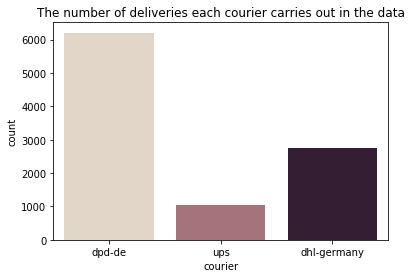

In [18]:
# observing the frequency of deliveries by each courier
sns.countplot(data= data, x="courier", palette="ch:.25")
plt.title("The number of deliveries each courier carries out in the data")

In [19]:
#creating a seperare data set that will be used for dashboarding
csv = data.copy()
csv.drop(['Epoch_created_date', 'Epoch_pickup_date', 'Epoch_delivery_date', 'Epoch_transit_date'], axis=1, inplace=True)

In [20]:
codes = pd.read_csv('codes.csv', error_bad_lines=False)

b'Skipping line 27: expected 6 fields, saw 7\nSkipping line 53: expected 6 fields, saw 7\nSkipping line 106: expected 6 fields, saw 7\nSkipping line 119: expected 6 fields, saw 7\nSkipping line 120: expected 6 fields, saw 7\nSkipping line 135: expected 6 fields, saw 7\nSkipping line 148: expected 6 fields, saw 7\nSkipping line 149: expected 6 fields, saw 7\nSkipping line 175: expected 6 fields, saw 7\nSkipping line 191: expected 6 fields, saw 7\nSkipping line 222: expected 6 fields, saw 7\nSkipping line 225: expected 6 fields, saw 7\nSkipping line 247: expected 6 fields, saw 7\nSkipping line 251: expected 6 fields, saw 7\nSkipping line 252: expected 6 fields, saw 7\n'


In [21]:
codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [22]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              241 non-null    object 
 1   Alpha-2 code         240 non-null    object 
 2   Alpha-3 code         241 non-null    object 
 3   Numeric code         241 non-null    int64  
 4   Latitude (average)   241 non-null    float64
 5   Longitude (average)  241 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [23]:
test = pd.merge(csv,codes,left_on='country',right_on='Alpha-3 code')

In [24]:
test.head()

,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date,time_taken,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02 00:00:00,1 days 17:59:00,United Kingdom,GB,GBR,826,54.0,-2.0
1,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01 00:00:00,2 days 20:30:00,United Kingdom,GB,GBR,826,54.0,-2.0
2,2020-09-01,2020-09-01 20:30:00,GBR,LE144NG,ups,GB-ENG,f,f,Doorstep,2020-09-03 10:00:00,2020-09-01 07:00:00,1 days 13:30:00,United Kingdom,GB,GBR,826,54.0,-2.0
3,2020-09-01,2020-09-01 14:41:00,GBR,LA12NH,dpd-de,GB-ENG,f,f,Unknown,2020-09-03 13:51:00,2020-09-01 00:00:00,1 days 23:10:00,United Kingdom,GB,GBR,826,54.0,-2.0
4,2020-09-01,2020-09-01 14:41:00,GBR,LA12NH,dpd-de,GB-ENG,f,f,Unknown,2020-09-03 13:51:00,2020-09-01 00:00:00,1 days 23:10:00,United Kingdom,GB,GBR,826,54.0,-2.0


In [25]:
test.drop(['Alpha-2 code', 'Alpha-3 code'], axis=1, inplace=True)
test.rename(columns={"country": "Alpha-3-code"}, inplace=True)

In [26]:
#format the dates for when they are exported
test.to_csv('deliveries.csv', encoding='utf-8', date_format='%Y-%m-%d %H:%M:%S', index=False)

### Creation of Model - converting dates into floats so they can then be predicted

In [27]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
data.head()

,created_date,in_transit_date,country,zip_code,courier,delivery_region,delivery_cancelled,return_tracking,delivery_location,delivery_date,pickup_date,Epoch_transit_date,Epoch_created_date,Epoch_delivery_date,Epoch_pickup_date,time_taken
0,2020-09-01,2020-09-02 13:19:00,GBR,RG64HX,dpd-de,GB-ENG,f,f,HomeDeposit,2020-09-04 07:18:00,2020-09-02,1599052740000,1598918400000,1599203880000,1599004800000,1 days 17:59:00
1,2020-09-01,2020-09-01 14:54:00,DEU,70563,dpd-de,DE-BW,f,f,Unknown,2020-09-02 09:15:00,2020-09-01,1598972040000,1598918400000,1599038100000,1598918400000,0 days 18:21:00
2,2020-09-01,2020-09-01 14:46:00,GBR,RG287FD,dpd-de,GB-ENG,f,f,Unknown,2020-09-04 11:16:00,2020-09-01,1598971560000,1598918400000,1599218160000,1598918400000,2 days 20:30:00
3,2020-09-01,2020-09-01 14:53:00,ITA,46100,dpd-de,IT-25,f,f,Unknown,2020-09-04 13:09:00,2020-09-01,1598971980000,1598918400000,1599224940000,1598918400000,2 days 22:16:00
4,2020-09-01,2020-09-02 13:02:00,ESP,07817,dpd-de,ES-IB,f,f,Unknown,2020-09-08 17:10:00,2020-09-02,1599051720000,1598918400000,1599585000000,1599004800000,6 days 04:08:00


In [29]:
data = sklearn.utils.shuffle(data)

X = data.loc[:,['delivery_region', 'courier', 'zip_code','return_tracking','delivery_location','Epoch_transit_date','Epoch_pickup_date']]
Y = data.Epoch_delivery_date

In [30]:
X.head()

,delivery_region,courier,zip_code,return_tracking,delivery_location,Epoch_transit_date,Epoch_pickup_date
146,GB-SCT,dpd-de,DD53QP,f,Unknown,1598973420000,1598918400000
4208,IE,ups,R45PK00,f,Doorstep,1599250800000,1599138000000
3053,DE-BW,dhl-germany,74626,f,Unknown,1598981220000,1598950800000
9356,IE,ups,N41RW14,f,Doorstep,1599250020000,1599138000000
2306,DE-NI,dpd-de,31542,f,Unknown,1599140460000,1599091200000


In [31]:
enc = LabelEncoder()
X.loc[:,['delivery_region', 'courier', 'zip_code','return_tracking','delivery_location']]= \
X.loc[:,['delivery_region', 'courier', 'zip_code','return_tracking','delivery_location']].apply(enc.fit_transform)


In [32]:
X.head()

,delivery_region,courier,zip_code,return_tracking,delivery_location,Epoch_transit_date,Epoch_pickup_date
146,106,1,5864,0,5,1598973420000,1598918400000
4208,110,2,6453,0,0,1599250800000,1599138000000
3053,44,0,4192,0,5,1598981220000,1598950800000
9356,110,2,6270,0,0,1599250020000,1599138000000
2306,50,1,1773,0,5,1599140460000,1599091200000


In [33]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3, random_state = 42)

In [34]:
regr = GradientBoostingRegressor(learning_rate =0.1, random_state=0, n_estimators=100, criterion ="squared_error", max_depth=12 )

In [35]:
regr.fit(X_train, Y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=12,
                          random_state=0)

In [36]:
pred = regr.predict(X_test)

In [37]:
pred

array([1.59908266e+12, 1.59946110e+12, 1.59913149e+12, ...,
       1.59922812e+12, 1.59965167e+12, 1.59929246e+12])

In [38]:
regr.score(X_test, Y_test)

0.7947067231831498

In [39]:
regr.score(X_train, Y_train)

0.9970581986165207

Text(0.5, 1.0, 'Feature importance for Gradient Boosting model')

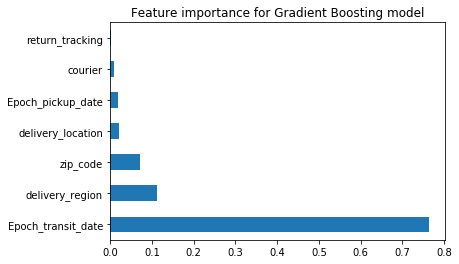

In [40]:
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature importance for Gradient Boosting model")

In [42]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=100, random_state=100, criterion ="squared_error", max_depth=12)
Forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=12, random_state=100)

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 433 to 3672
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   delivery_region     3000 non-null   int32
 1   courier             3000 non-null   int32
 2   zip_code            3000 non-null   int32
 3   return_tracking     3000 non-null   int32
 4   delivery_location   3000 non-null   int32
 5   Epoch_transit_date  3000 non-null   int64
 6   Epoch_pickup_date   3000 non-null   int64
dtypes: int32(5), int64(2)
memory usage: 128.9 KB


In [44]:
predForest = Forest.predict(X_test)

In [45]:
print(predForest)

[1.59906566e+12 1.59944177e+12 1.59915451e+12 ... 1.59923559e+12
 1.59966246e+12 1.59930025e+12]


In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test,predForest)

0.8387362748587766

Text(0.5, 1.0, 'Feature importance for Random Forest')

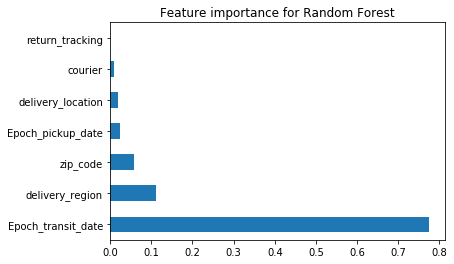

In [47]:
feat_importances = pd.Series(Forest.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature importance for Random Forest")

In [48]:
import pickle
filename = 'GradientBoosting.pkl'
pickle.dump(regr, open(filename, 'wb'))

filename = 'RandomForest.pkl'
pickle.dump(Forest, open(filename, 'wb'))

In [2]:
import pickle

In [3]:
model=pickle.load(open('GradientBoosting.pkl','rb'))

In [4]:
Result = model.predict([[44,0,4390,0,5,1598982420000,1598947200000]])

D:\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
Result.dtype

dtype('float64')

In [12]:
test = Result.item(0)
test = test/1000
print(test)

1599073286.7364225


In [13]:
import datetime
datetime = datetime.datetime.fromtimestamp(test)

In [14]:
print(datetime)

2020-09-02 20:01:26.736423
